# Assignment 3

The assignment 3 contains 1 question and the due date is April 28th (Sunday) 23:59PM. If you have trouble in installing tensorflow in your computer, you may consider using Google Colab for this assignment.

## Question 1 How Yelp Uses Deep Learning to Classify Business Photos? (100 points)

Yelp hosts tens of millions of photos uploaded by Yelpers from all around the world. The wide variety of these photos provides a rich window into local businesses, a window we’re only just peeking through today.

One way we’re trying to open that window is by developing a photo understanding system which allows us to create semantic data about individual photographs. The data generated by the system has been powering our recent launch of tabbed photo browsing as well as our first attempts at content-based photo diversification.

You can check more details about Yelp's practices at [here](https://engineeringblog.yelp.com/2015/10/how-we-use-deep-learning-to-classify-business-photos-at-yelp.html)


![food](https://engineeringblog.yelp.com/images/posts/2015-10-14-photo-classification/image02.png)


In this question, you will be asked to building a Photo Classifier.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from PIL import Image
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Let's first upload the file images.npy and labels.npy and load the images dataset.

In [ ]:
images = np.load('images.npy') # SHAPE: (1024, 256, 256, 3) -> (N_SAMPLES, HEIGHT, WIDTH, CHANNELS)
labels = np.load('labels.npy') # SHAPE: (1024,) -> (N_SAMPLES,). Label encoded: 0, 1, 2, 3

print('Images shape:', images.shape)
print('Labels shape:', labels.shape)
print('Labels match the image at the respective 0 to 1024 position.')

Images shape: (1024, 256, 256, 3)
Labels shape: (1024,)
Labels match the image at the respective 0 to 1024 position.


There are four types of the images on Yelp: Food, Drink, Interior and Exterior

In [ ]:
np.unique(labels)

array([0, 1, 2, 3], dtype=int64)

We visualize some random images from the dataset below:

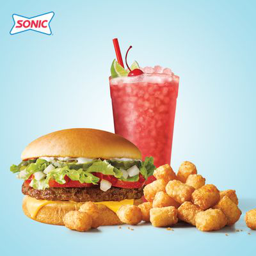

In [ ]:
# food: class 0

Image.fromarray(images[5])

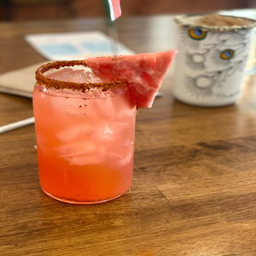

In [ ]:
# drink: class 1

Image.fromarray(images[3])

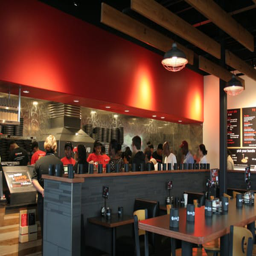

In [ ]:
# interior: class 2

Image.fromarray(images[7])

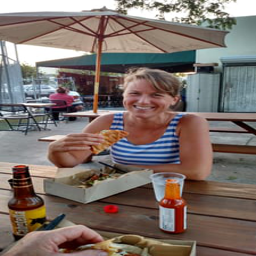

In [ ]:
# exterior: class 3

Image.fromarray(images[8])

### Question 1.1 Training a deep neural network (15 points)

Practice training a deep neural network on the Yelp image dataset


Build a Deep Neural Network (DNN) with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this question), using the RELU activation function.

Using Adam optimization, train the network on the dataset. Do not forget define your input and output layers.

Train the model for 100 epochs and use test set as the validation data during the training, explain how many parameters does the model have and whether the model will experience overfitting. You may consider plotting the losses and accuracy over epochs.

In [ ]:
from sklearn.model_selection import train_test_split

# Normalize the pixel values to 0-1
images = images / 255.0

X_train, X_valid, y_train, y_valid = train_test_split(images, labels, test_size=0.2, random_state=42)

print('Training images shape:', X_train.shape)
print('Validation images shape:', X_valid.shape)
print('Training labels shape:', y_train.shape)
print('Validation labels shape:', y_valid.shape)

Training images shape: (819, 256, 256, 3)
Validation images shape: (205, 256, 256, 3)
Training labels shape: (819,)
Validation labels shape: (205,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Convert integer labels to one-hot vectors
y_train_one_hot = to_categorical(y_train, num_classes=4)
y_valid_one_hot = to_categorical(y_valid, num_classes=4)

# Modify the model to use softmax for multi-class single-label classification
model = Sequential()
model.add(Flatten(input_shape=(256, 256, 3)))

# Add 20 hidden layers with 100 neurons each
for _ in range(20):
    model.add(Dense(100, activation='relu'))

# Change to softmax output layer for multi-class single-label classification
model.add(Dense(4, activation='softmax'))  # Changed from sigmoid to softmax

# Compile the model for multi-class classification
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',  # Changed from binary to categorical crossentropy
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │    19,660,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 4)              │           404 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,853,204 (75.73 MB)

 Trainable params: 19,853,204 (75.73 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train and evaluate the model using one-hot encoded labels
history = model.fit(X_train, y_train_one_hot, epochs=100, validation_data=(X_valid, y_valid_one_hot))

val_loss, val_acc = model.evaluate(X_valid, y_valid_one_hot)
print(f'Validation accuracy: {val_acc}')

# Calculate the number of parameters in the model
total_params = model.count_params()
print(f'Total number of parameters: {total_params}')

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 193ms/step - accuracy: 0.2526 - loss: 1.3871 - val_accuracy: 0.2780 - val_loss: 1.3843
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.2874 - loss: 1.3628 - val_accuracy: 0.2488 - val_loss: 1.5270
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.3310 - loss: 1.3699 - val_accuracy: 0.2878 - val_loss: 1.6465
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 174ms/step - accuracy: 0.3008 - loss: 1.4208 - val_accuracy: 0.2341 - val_loss: 1.4726
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.3515 - loss: 1.3471 - val_accuracy: 0.3366 - val_loss: 1.3928
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - accuracy: 0.3891 - loss: 1.2696 - val_accuracy: 0.2732 - val_loss: 1.6086
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.3195 - loss: 1.3246 - val_accuracy: 0.3610 - val_loss: 1.3108
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.3984 - loss: 1.2242 - val_acc

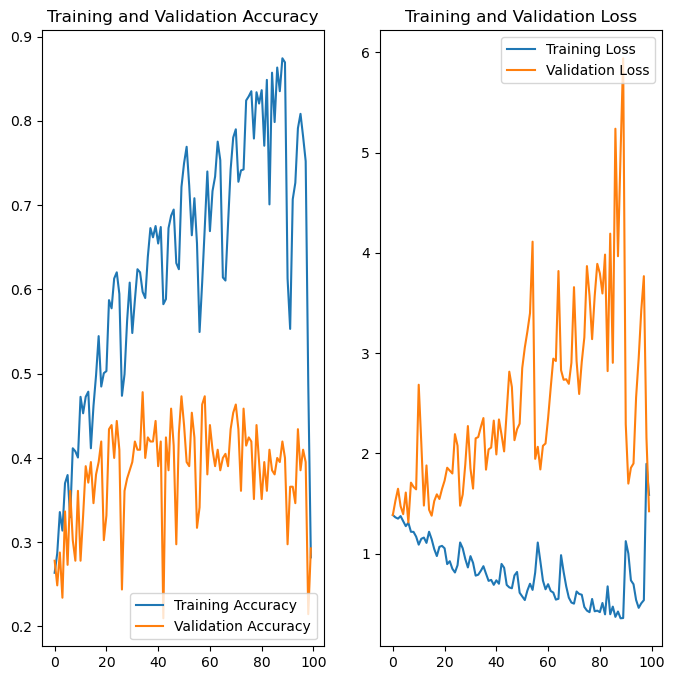

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In conclusion, the deep neural network (DNN) built for the Yelp image dataset is excessively deep with 20 hidden layers, each consisting of 100 neurons. The baseline model's total number of parameters is 19,853,204. This substantial number is primarily due to the high number of neurons and layers, with the first dense layer after flattening having the most significant number of parameters (19,666,900). The DNN utilizes the ReLU activation function and is trained with Adam optimization over 100 epochs.

The plotted training and validation loss and accuracy over epochs reveals important information about the model's performance:

- Fluctuating Accuracy: The training accuracy improves as the number of epochs increases, which is expected. However, the validation accuracy fluctuates significantly and does not show a consistent improvement. This is indicative of the model not generalizing well to unseen data.

- Diverging Loss: The training loss decreases over time, but the validation loss shows high volatility and an increasing trend, especially after the early epochs. This suggests the model is overfitting the training data and failing to predict accurately on the validation set.

- Overfitting Evidence: The overfitting is further evidenced by the gap between the training and validation accuracy and loss. Training accuracy is higher and training loss is lower compared to their validation counterparts, especially in the later epochs. This is a classic sign of overfitting, where the model learns the training data too well, including its noise and outliers, which does not generalize to new, unseen data.

- Unusual Behaviour: There are unusual spikes in validation loss which can indicate problems with the data, such as mislabeling, or with the model's learning process. The baseline's model's performance deteriorates in the final epochs, which is unusual as we would expect the model's performance to either improve or plateau, not worsen drastically.

- Final Performance: The final accuracy on the validation set after 100 epochs is approximately 29.27%, which is quite low, indicating poor performance of the model on the dataset.

### Question 1.2 (25 points)

Try reduce the overfitting and improve the model performance. You can try the bag of tricks to the model from the class. This may include one or more techniques such as **weight regularization**, **batch normalization**, **dropout**, **Early stopping**, etc. You should perform ``ablation study``, a common techniqued used in machine learning community to show the effectivess of the introduced technique. In other words, show your step-by-step improvement by including these techniques and repeat the repeat the previous training process. Explain whether and how these techniques help achieve a better result. You may consider stopping improving the model by making it at least 10% better than the previous model architecture.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.optimizers import Adam

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - accuracy: 0.2559 - loss: 1.3888 - val_accuracy: 0.2537 - val_loss: 1.3927
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.3247 - loss: 1.3566 - val_accuracy: 0.3610 - val_loss: 1.3475
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.4288 - loss: 1.2785 - val_accuracy: 0.4439 - val_loss: 1.3061
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.4269 - loss: 1.2349 - val_accuracy: 0.4537 - val_loss: 1.3416
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.5216 - loss: 1.1103 - val_accuracy: 0.4878 - val_loss: 1.1734
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.5498 - loss: 1.0708 - val_accuracy: 0.4293 - val_loss: 1.6055
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.5345 - loss: 1.0642 - val_accuracy: 0.4585 - val_loss: 1.3055
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.5717 - loss: 1.0129 - val_acc

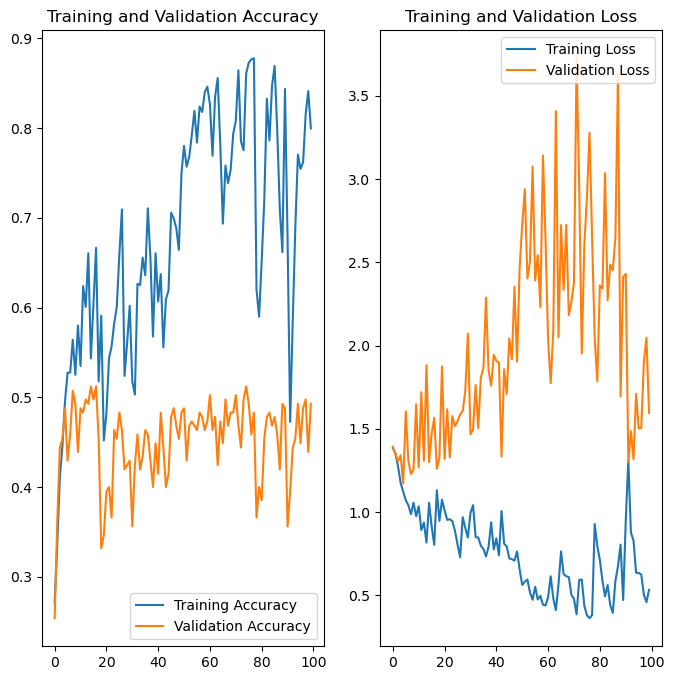

In [ ]:
# Weight Initialization

# Initialize the model
model = Sequential()
model.add(Flatten(input_shape=(256, 256, 3)))

# Add hidden layers with He Normal weight initialization
for _ in range(20):
    model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))

# Output layer for classification
model.add(Dense(units=4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
epochs = 100
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid))

# Evaluate the model's performance on the validation set
val_loss, val_acc = model.evaluate(X_valid, y_valid)
print(f'Validation accuracy: {val_acc}')

# Calculate the number of parameters in the model
total_params = model.count_params()
print(f'Total number of parameters: {total_params}')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 100)            │    19,660,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 4)              │           404 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,559,614 (227.20 MB)

 Trainable params: 19,853,204 (75.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 39,706,410 (151.47 MB)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 266ms/step - accuracy: 0.2299 - loss: 19.0142 - val_accuracy: 0.2878 - val_loss: 13.2444
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 221ms/step - accuracy: 0.2708 - loss: 11.8957 - val_accuracy: 0.2439 - val_loss: 8.4619
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 222ms/step - accuracy: 0.2673 - loss: 7.6277 - val_accuracy: 0.2244 - val_loss: 5.5073
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 224ms/step - accuracy: 0.2286 - loss: 4.9991 - val_accuracy: 0.2244 - val_loss: 3.7193
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 222ms/step - accuracy: 0.2150 - loss: 3.4173 - val_accuracy: 0.2244 - val_loss: 2.6661
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - accuracy: 0.2173 - loss: 2.4918 - val_accuracy: 0.2244 - val_loss: 2.0651
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 225ms/step - accuracy: 0.2236 - loss: 1.9676 - val_accuracy: 0.2244 - val_loss: 1.7340
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - accuracy: 0.2268 - loss: 1.6812 - val_

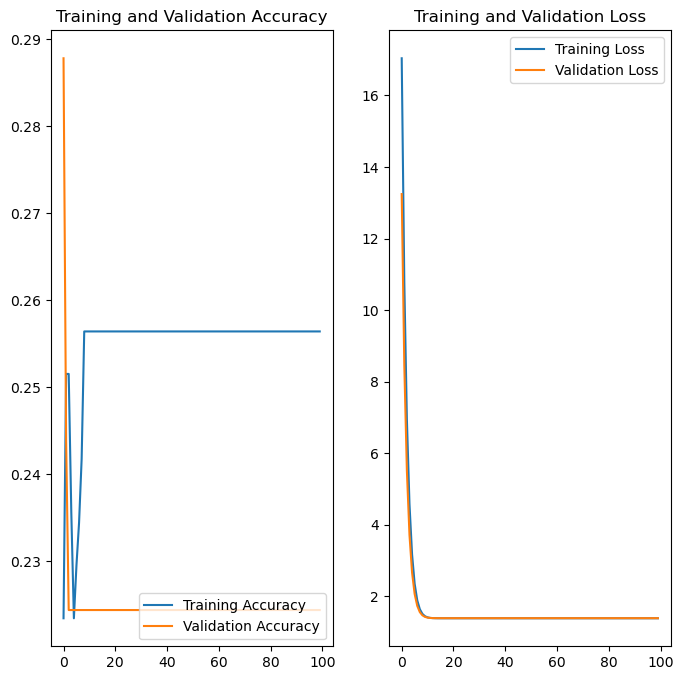

In [ ]:
# l2 Regularization

# Initialize the model
model = Sequential()
model.add(Flatten(input_shape=(256, 256, 3)))

# Add hidden layers with L2 regularization
for _ in range(20):
    model.add(Dense(100, activation='relu', kernel_regularizer=l2(0.01)))

# Output layer for classification
model.add(Dense(units=4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
epochs = 100
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid))

# Evaluate the model's performance on the validation set
val_loss, val_acc = model.evaluate(X_valid, y_valid)
print(f'Validation accuracy: {val_acc}')

# Calculate the number of parameters in the model
total_params = model.count_params()
print(f'Total number of parameters: {total_params}')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_126 (Dense)               │ (None, 100)            │    19,660,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_134 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_135 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_137 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_138 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_140 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 4)              │           404 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,559,614 (227.20 MB)

 Trainable params: 19,853,204 (75.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 39,706,410 (151.47 MB)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 37s 240ms/step - accuracy: 0.2603 - loss: 1.8313 - val_accuracy: 0.2244 - val_loss: 1.3984
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.2515 - loss: 1.6698 - val_accuracy: 0.2244 - val_loss: 1.4160
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.3026 - loss: 1.5373 - val_accuracy: 0.2244 - val_loss: 1.4184
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 0.2960 - loss: 1.5472 - val_accuracy: 0.2244 - val_loss: 1.4069
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - accuracy: 0.2846 - loss: 1.5646 - val_accuracy: 0.2293 - val_loss: 1.3976
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step - accuracy: 0.3364 - loss: 1.4251 - val_accuracy: 0.1610 - val_loss: 1.3993
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - accuracy: 0.3482 - loss: 1.3502 - val_accuracy: 0.2634 - val_loss: 1.3853
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - accuracy: 0.3612 - loss: 1.3576 - val_acc

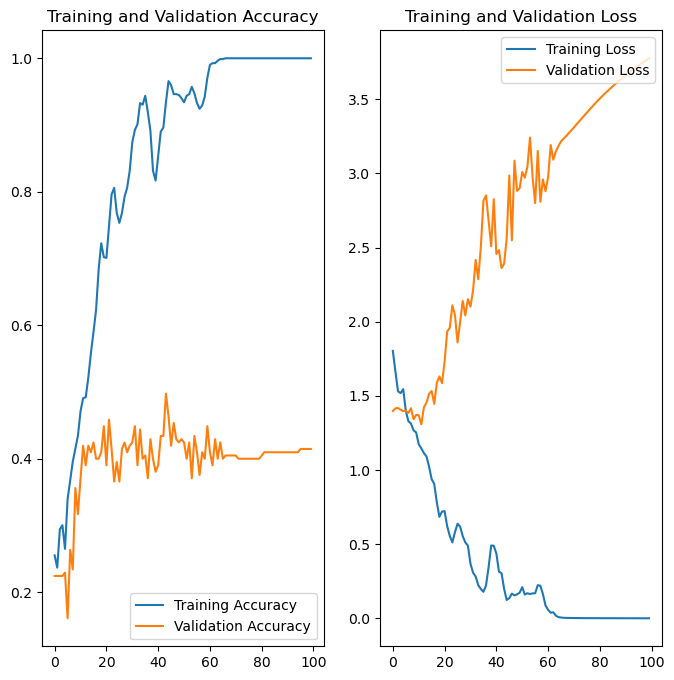

In [ ]:
# Batch Normalization

# Initialize the model
model = Sequential()
model.add(Flatten(input_shape=(256, 256, 3)))

# Add hidden layers with batch normalization
for _ in range(20):
    model.add(Dense(100, activation='relu'))
    model.add(BatchNormalization())

# Output layer for classification
model.add(Dense(units=4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
epochs = 100
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid))

# Evaluate the model's performance on the validation set
val_loss, val_acc = model.evaluate(X_valid, y_valid)
print(f'Validation accuracy: {val_acc}')

# Calculate the number of parameters in the model
total_params = model.count_params()
print(f'Total number of parameters: {total_params}')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 100)            │    19,660,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_150 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 59,575,614 (227.26 MB)

 Trainable params: 19,857,204 (75.75 MB)

 Non-trainable params: 4,000 (15.62 KB)

 Optimizer params: 39,714,410 (151.50 MB)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 23s 238ms/step - accuracy: 0.2407 - loss: 1.4218 - val_accuracy: 0.2878 - val_loss: 1.3852
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - accuracy: 0.2445 - loss: 1.4193 - val_accuracy: 0.2878 - val_loss: 1.3847
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - accuracy: 0.2474 - loss: 1.3957 - val_accuracy: 0.2878 - val_loss: 1.3850
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.3102 - loss: 1.3839 - val_accuracy: 0.2878 - val_loss: 1.3850
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.2698 - loss: 1.3813 - val_accuracy: 0.2878 - val_loss: 1.3849
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - accuracy: 0.2756 - loss: 1.3861 - val_accuracy: 0.2878 - val_loss: 1.3846
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - accuracy: 0.3008 - loss: 1.3811 - val_accuracy: 0.2878 - val_loss: 1.3848
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - accuracy: 0.2562 - loss: 1.3833 - val_acc

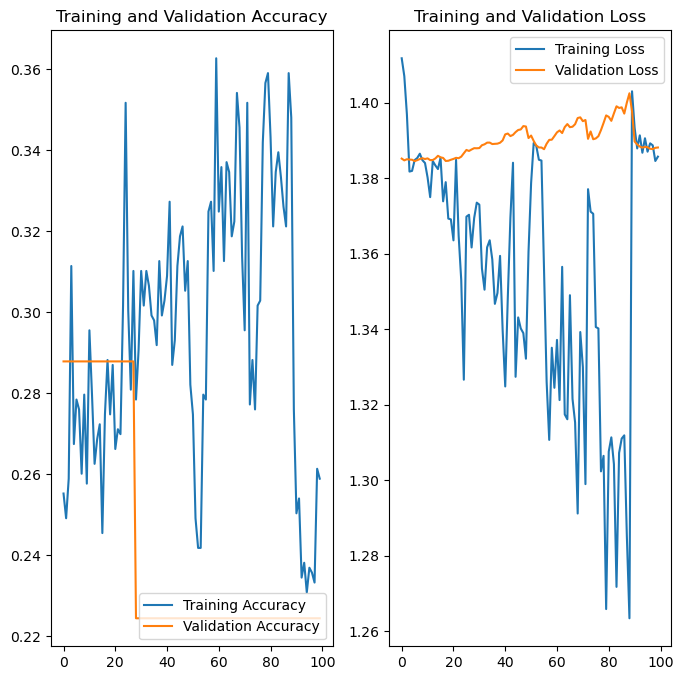

In [ ]:
# Dropout

# Initialize the model
model = Sequential()
model.add(Flatten(input_shape=(256, 256, 3)))

# Add hidden layers with dropout
for _ in range(20):
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))

# Output layer for classification
model.add(Dense(units=4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
epochs = 100
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid))

# Evaluate the model's performance on the validation set
val_loss, val_acc = model.evaluate(X_valid, y_valid)
print(f'Validation accuracy: {val_acc}')

# Calculate the number of parameters in the model
total_params = model.count_params()
print(f'Total number of parameters: {total_params}')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_168 (Dense)               │ (None, 100)            │    19,660,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_169 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_170 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_171 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_172 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_173 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_174 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_175 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_176 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_177 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_178 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_179 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 100)            │             

 Total params: 59,559,614 (227.20 MB)

 Trainable params: 19,853,204 (75.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 39,706,410 (151.47 MB)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 200ms/step - accuracy: 0.2317 - loss: 1.3869 - val_accuracy: 0.2439 - val_loss: 1.3860
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.2412 - loss: 1.3866 - val_accuracy: 0.2439 - val_loss: 1.3867
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.2039 - loss: 1.3867 - val_accuracy: 0.2244 - val_loss: 1.3876
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.2223 - loss: 1.3871 - val_accuracy: 0.2244 - val_loss: 1.3877
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.2278 - loss: 1.3871 - val_accuracy: 0.2439 - val_loss: 1.3879
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.2496 - loss: 1.3866 - val_accuracy: 0.2244 - val_loss: 1.3879
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.2338 - loss: 1.3875 - val_accuracy: 0.2244 - val_loss: 1.3878
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.2456 - loss: 1.3866 - val_acc

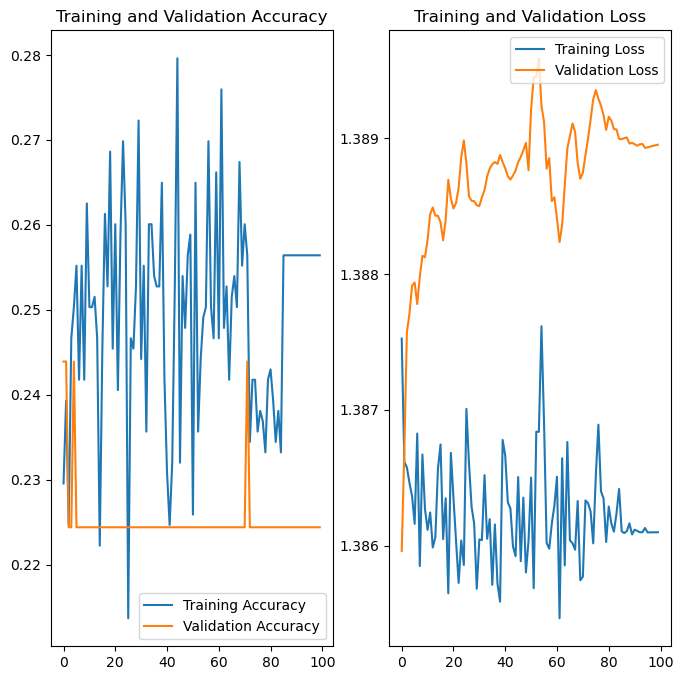

In [ ]:
# Dropout Final

# Initialize the model
model = Sequential()
model.add(Flatten(input_shape=(256, 256, 3)))

# Add hidden layers without dropout
for _ in range(20):
    model.add(Dense(100, activation='relu'))

# Add dropout before the output layer
model.add(Dropout(0.5))

# Output layer for classification
model.add(Dense(units=4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
epochs = 100
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid))

# Evaluate the model's performance on the validation set
val_loss, val_acc = model.evaluate(X_valid, y_valid)
print(f'Validation accuracy: {val_acc}')

# Calculate the number of parameters in the model
total_params = model.count_params()
print(f'Total number of parameters: {total_params}')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_211 (Dense)               │ (None, 100)            │    19,660,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_212 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_213 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_214 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_215 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_216 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_217 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_218 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_219 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_220 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_221 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_222 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_223 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_224 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_225 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_226 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_227 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_228 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_229 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_230 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_84 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_231 (Dense)               │ (None, 4)              │           404 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,559,614 (227.20 MB)

 Trainable params: 19,853,204 (75.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 39,706,410 (151.47 MB)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 22s 266ms/step - accuracy: 0.2701 - loss: 37.2961 - val_accuracy: 0.2439 - val_loss: 29.6687
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - accuracy: 0.3335 - loss: 27.5734 - val_accuracy: 0.2927 - val_loss: 22.2143
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 222ms/step - accuracy: 0.3405 - loss: 20.6623 - val_accuracy: 0.2780 - val_loss: 16.7553
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - accuracy: 0.3525 - loss: 15.5661 - val_accuracy: 0.3122 - val_loss: 12.6372
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 222ms/step - accuracy: 0.3580 - loss: 11.7891 - val_accuracy: 0.3024 - val_loss: 9.6482
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - accuracy: 0.3675 - loss: 9.0113 - val_accuracy: 0.3512 - val_loss: 7.4541
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 276ms/step - accuracy: 0.3774 - loss: 6.9679 - val_accuracy: 0.3707 - val_loss: 5.8034
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 253ms/step - accuracy: 0.3728 - loss: 5.4968 

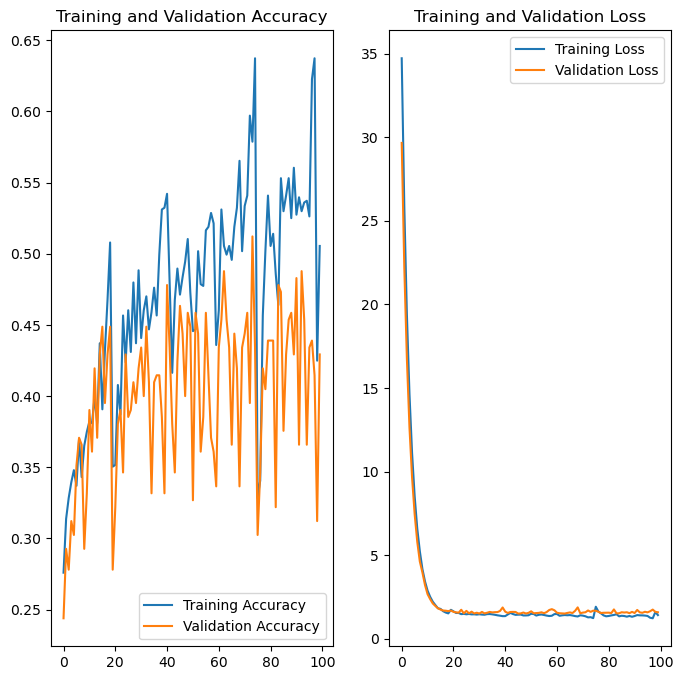

In [ ]:
# L2 + Weight

# Initialize the model
model = Sequential()
model.add(Flatten(input_shape=(256, 256, 3)))

# Add hidden layers with L2 regularization and He Normal weight initialization
for _ in range(20):
    model.add(Dense(100, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))

# Output layer for classification
model.add(Dense(units=4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
epochs = 100
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid))

# Evaluate the model's performance on the validation set
val_loss, val_acc = model.evaluate(X_valid, y_valid)
print(f'Validation accuracy: {val_acc}')

# Calculate the number of parameters in the model
total_params = model.count_params()
print(f'Total number of parameters: {total_params}')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_210 (Dense)               │ (None, 100)            │    19,660,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_211 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_212 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_213 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_214 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_215 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_216 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_217 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_218 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_219 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_220 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_221 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_222 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_223 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_224 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_225 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_226 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_227 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_228 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_229 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_230 (Dense)               │ (None, 4)              │           404 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,559,614 (227.20 MB)

 Trainable params: 19,853,204 (75.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 39,706,410 (151.47 MB)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 299ms/step - accuracy: 0.2691 - loss: 43.4666 - val_accuracy: 0.1854 - val_loss: 46.4990
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 261ms/step - accuracy: 0.2730 - loss: 46.9666 - val_accuracy: 0.1854 - val_loss: 46.7763
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 277ms/step - accuracy: 0.2279 - loss: 46.8394 - val_accuracy: 0.2000 - val_loss: 46.1349
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 243ms/step - accuracy: 0.2484 - loss: 46.1079 - val_accuracy: 0.2829 - val_loss: 45.4118
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 241ms/step - accuracy: 0.2867 - loss: 45.3677 - val_accuracy: 0.2683 - val_loss: 44.7177
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 328ms/step - accuracy: 0.2874 - loss: 44.6273 - val_accuracy: 0.2829 - val_loss: 43.9672
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 257ms/step - accuracy: 0.2868 - loss: 43.8939 - val_accuracy: 0.2976 - val_loss: 43.2466
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step - accuracy: 0.3218 - loss: 43

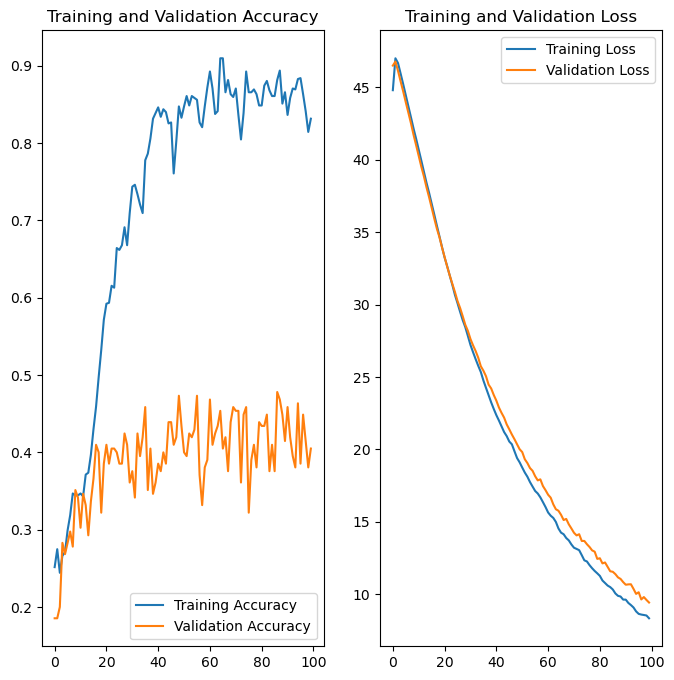

In [ ]:
# L2 + Weight + Norm

# Initialize the model
model = Sequential()
model.add(Flatten(input_shape=(256, 256, 3)))

# Add hidden layers with L2 regularization, He Normal weight initialization, and batch normalization
for _ in range(20):
    model.add(Dense(100, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())

# Output layer for classification
model.add(Dense(units=4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
epochs = 100
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid))

# Evaluate the model's performance on the validation set
val_loss, val_acc = model.evaluate(X_valid, y_valid)
print(f'Validation accuracy: {val_acc}')

# Calculate the number of parameters in the model
total_params = model.count_params()
print(f'Total number of parameters: {total_params}')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)            │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_253 (Dense)               │ (None, 100)            │    19,660,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_91          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_254 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_92          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_255 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_93          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_256 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_94          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_257 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_95          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_258 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_96          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_259 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_97          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_260 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_98          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_261 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_99          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_262 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 59,575,614 (227.26 MB)

 Trainable params: 19,857,204 (75.75 MB)

 Non-trainable params: 4,000 (15.62 KB)

 Optimizer params: 39,714,410 (151.50 MB)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 26s 254ms/step - accuracy: 0.2355 - loss: 44.3702 - val_accuracy: 0.2439 - val_loss: 47.1024
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - accuracy: 0.2338 - loss: 48.2305 - val_accuracy: 0.2439 - val_loss: 47.5970
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 212ms/step - accuracy: 0.2742 - loss: 48.2763 - val_accuracy: 0.2439 - val_loss: 47.3933
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - accuracy: 0.2510 - loss: 48.0186 - val_accuracy: 0.2195 - val_loss: 47.1633
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 212ms/step - accuracy: 0.2299 - loss: 47.7285 - val_accuracy: 0.2976 - val_loss: 46.8577
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 213ms/step - accuracy: 0.2462 - loss: 47.2039 - val_accuracy: 0.2293 - val_loss: 46.4628
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 213ms/step - accuracy: 0.2591 - loss: 46.7585 - val_accuracy: 0.2244 - val_loss: 46.0235
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 210ms/step - accuracy: 0.2774 - loss: 46

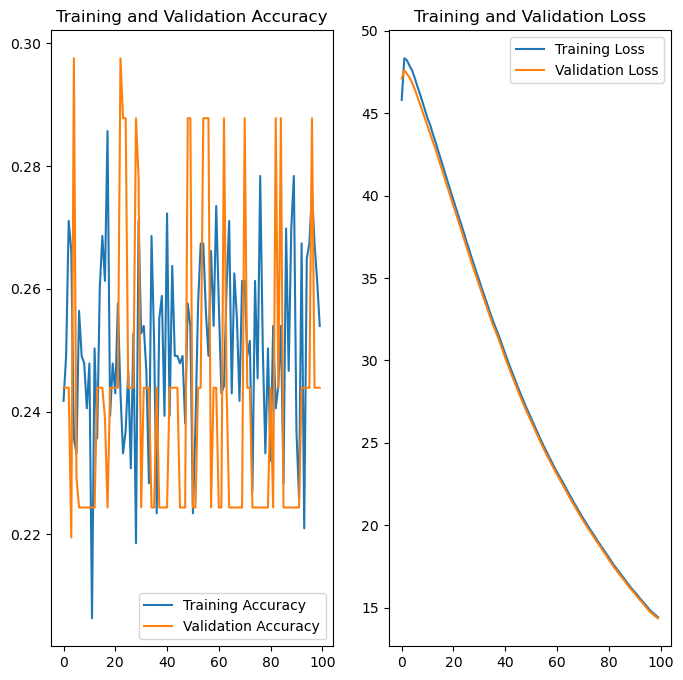

In [ ]:
# L2 + Weight + Norm + Dropout

# Initialize the model
model = Sequential()
model.add(Flatten(input_shape=(256, 256, 3)))

# Add hidden layers with L2 regularization, He Normal weight initialization, batch normalization, and dropout
for _ in range(20):
    model.add(Dense(100, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

# Output layer for classification
model.add(Dense(units=4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
epochs = 100
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid))

# Evaluate the model's performance on the validation set
val_loss, val_acc = model.evaluate(X_valid, y_valid)
print(f'Validation accuracy: {val_acc}')

# Calculate the number of parameters in the model
total_params = model.count_params()
print(f'Total number of parameters: {total_params}')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)            │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_274 (Dense)               │ (None, 100)            │    19,660,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_111         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_85 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_275 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_112         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_86 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_276 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_113         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_87 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_277 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_114         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_88 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_278 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_115         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_89 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_279 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_116         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_90 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_280 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_117         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 59,575,614 (227.26 MB)

 Trainable params: 19,857,204 (75.75 MB)

 Non-trainable params: 4,000 (15.62 KB)

 Optimizer params: 39,714,410 (151.50 MB)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 24s 242ms/step - accuracy: 0.2430 - loss: 44.4971 - val_accuracy: 0.2049 - val_loss: 46.8965
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - accuracy: 0.2520 - loss: 48.5115 - val_accuracy: 0.2488 - val_loss: 47.6573
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - accuracy: 0.2473 - loss: 48.7177 - val_accuracy: 0.2439 - val_loss: 47.5192
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - accuracy: 0.2408 - loss: 48.5387 - val_accuracy: 0.2244 - val_loss: 47.2766
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - accuracy: 0.3062 - loss: 47.9417 - val_accuracy: 0.2244 - val_loss: 46.9994
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 211ms/step - accuracy: 0.2635 - loss: 47.6619 - val_accuracy: 0.3073 - val_loss: 46.6485
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 239ms/step - accuracy: 0.2360 - loss: 47.3612 - val_accuracy: 0.2244 - val_loss: 46.3533
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 257ms/step - accuracy: 0.2419 - loss: 46

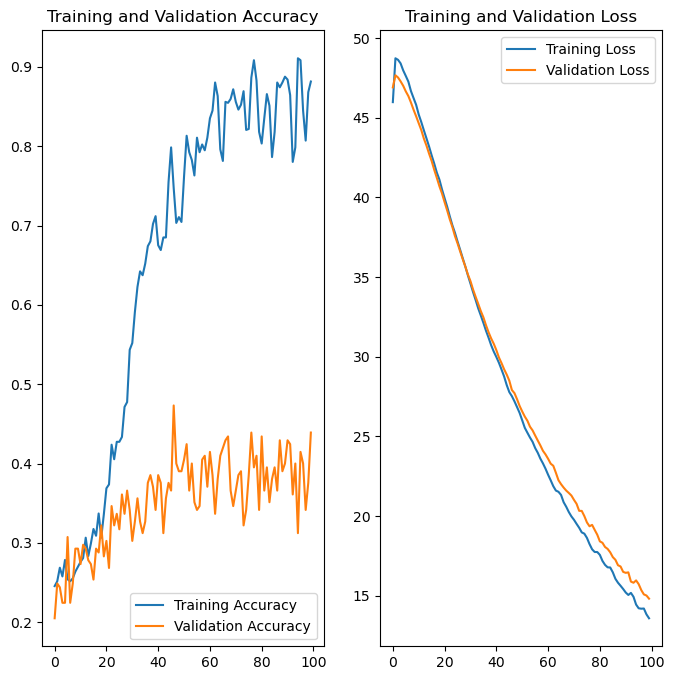

In [ ]:
# L2 + Weight + Norm + Dropout Final

# Initialize the model
model = Sequential()
model.add(Flatten(input_shape=(256, 256, 3)))

# Add hidden layers with L2 regularization, He Normal weight initialization, and batch normalization
for _ in range(20):
    model.add(Dense(100, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())

# Add dropout before the output layer
model.add(Dropout(0.7))

# Output layer for classification
model.add(Dense(units=4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
epochs = 100
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid))

# Evaluate the model's performance on the validation set
val_loss, val_acc = model.evaluate(X_valid, y_valid)
print(f'Validation accuracy: {val_acc}')

# Calculate the number of parameters in the model
total_params = model.count_params()
print(f'Total number of parameters: {total_params}')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)            │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_295 (Dense)               │ (None, 100)            │    19,660,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_131         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_296 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_132         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_297 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_133         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_298 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_134         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_299 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_135         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_300 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_136         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_301 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_137         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_302 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_138         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_303 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_139         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_304 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 59,575,614 (227.26 MB)

 Trainable params: 19,857,204 (75.75 MB)

 Non-trainable params: 4,000 (15.62 KB)

 Optimizer params: 39,714,410 (151.50 MB)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 27s 255ms/step - accuracy: 0.2277 - loss: 44.0194 - val_accuracy: 0.2098 - val_loss: 46.7281
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - accuracy: 0.2625 - loss: 47.8860 - val_accuracy: 0.2195 - val_loss: 47.3246
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - accuracy: 0.2171 - loss: 48.0459 - val_accuracy: 0.2390 - val_loss: 47.0712
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 212ms/step - accuracy: 0.2531 - loss: 47.6042 - val_accuracy: 0.2293 - val_loss: 46.7161
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - accuracy: 0.2804 - loss: 47.1321 - val_accuracy: 0.2439 - val_loss: 46.3103
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 212ms/step - accuracy: 0.2553 - loss: 46.7055 - val_accuracy: 0.2390 - val_loss: 45.8958
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 216ms/step - accuracy: 0.2815 - loss: 46.1992 - val_accuracy: 0.2927 - val_loss: 45.3852
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - accuracy: 0.3013 - loss: 45

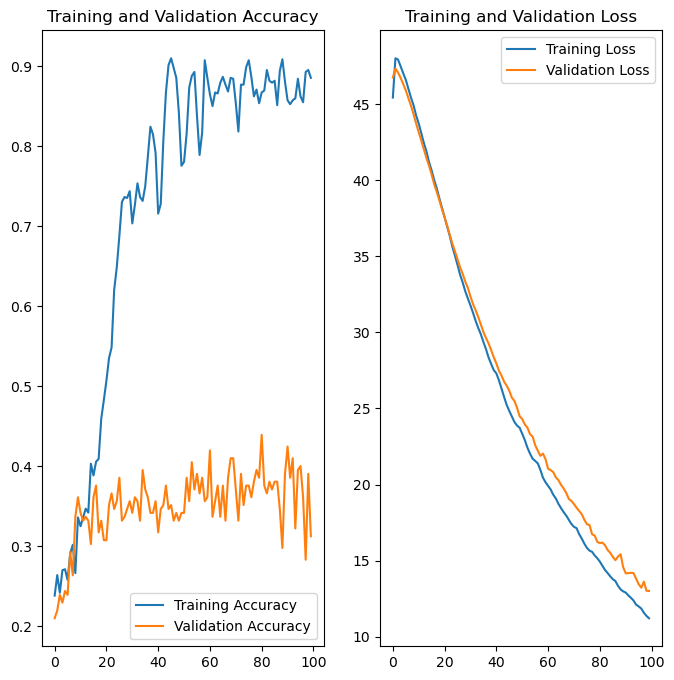

In [ ]:
# L2 + Weight + Norm + Dropout +  Early Stopping Final
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Dropout
from keras.regularizers import l2
from keras.initializers import HeNormal
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Initialize the model
model = Sequential()
model.add(Flatten(input_shape=(256, 256, 3)))

# Add hidden layers with L2 regularization, He Normal weight initialization, and batch normalization
for _ in range(20):
    model.add(Dense(100, activation='relu', kernel_initializer=HeNormal(), kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())

# Add dropout before the output layer
model.add(Dropout(0.5))

# Output layer for classification
model.add(Dense(units=4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set early stopping monitor
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    verbose=1,           # To print messages when early stopping is triggered
    restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored quantity

# Training parameters
epochs = 100

# Fit the model with the early stopping callback
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid), callbacks=[early_stopping_monitor])

# Evaluate the model's performance on the validation set
val_loss, val_acc = model.evaluate(X_valid, y_valid)
print(f'Validation accuracy: {val_acc}')

# Calculate the number of parameters in the model
total_params = model.count_params()
print(f'Total number of parameters: {total_params}')

# Access the history of training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))  # Adjust the range based on the actual number of epochs run

# Plotting the training and validation accuracy and loss
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_16 (Flatten)            │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_315 (Dense)               │ (None, 100)            │    19,660,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_100         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_316 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_101         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_317 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_102         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_318 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_103         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_319 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_104         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_320 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_105         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_321 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_106         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_322 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_107         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_323 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_108         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_324 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 59,575,614 (227.26 MB)

 Trainable params: 19,857,204 (75.75 MB)

 Non-trainable params: 4,000 (15.62 KB)

 Optimizer params: 39,714,410 (151.50 MB)

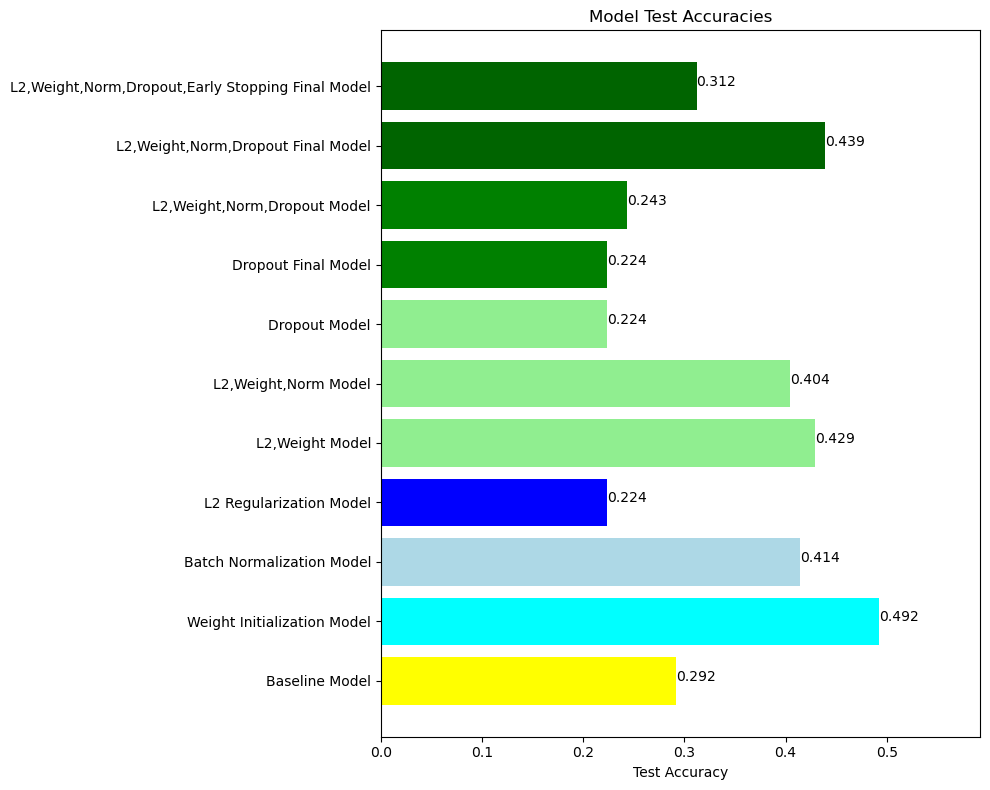

In [ ]:
import matplotlib.pyplot as plt

# Dictionary mapping model names to their respective accuracies
model_accuracies = {
    'Baseline Model': 0.292,
    'Weight Initialization Model': 0.492,
    'Batch Normalization Model': 0.414,
    'L2 Regularization Model': 0.224,
    'L2,Weight Model': 0.429,
    'L2,Weight,Norm Model': 0.404,
    'Dropout Model': 0.224,
    'Dropout Final Model': 0.224,
    'L2,Weight,Norm,Dropout Model': 0.243,
    'L2,Weight,Norm,Dropout Final Model': 0.439,
    'L2,Weight,Norm,Dropout,Early Stopping Final Model': 0.312
}

# Color scheme for the bar chart, visually grouping similar model types
colors = [
    'yellow',  # Baseline
    'cyan',    # Weight Initialization
    'lightblue',  # Batch Normalization
    'blue',    # L2 Regularization and variations
    'lightgreen', 'lightgreen', 'lightgreen',  # L2 and Weight combinations
    'green', 'green',  # Dropout variations
    'darkgreen', 'darkgreen'  # Dropout and Early Stopping Final combinations
]
# Create a figure with specified size
plt.figure(figsize=(10, 8))

# Create a horizontal bar chart
plt.barh(list(model_accuracies.keys()), list(model_accuracies.values()), color=colors)

# Annotate each bar with the corresponding accuracy value
for index, value in enumerate(model_accuracies.values()):
    plt.text(value, index, f"{value:.3f}")

# Label for x-axis
plt.xlabel('Test Accuracy')

# Title of the plot
plt.title('Model Test Accuracies')

# Set the x-axis limits to fit the data
plt.xlim(0, max(model_accuracies.values()) + 0.1)

# Adjust layout to not cut off content
plt.tight_layout()

# Display the plot
plt.show()

The conclusions reached indicate an ablation study where various techniques are applied to the deep neural network to mitigate overfitting and improve model performance. The "baseline model" done in 1.1 serves as the starting point, with a test accuracy of 0.292, and subsequent bars represent models with additional techniques applied. Here's a summary of the findings:

- Baseline Model: The original model without any regularization or normalization techniques has a test accuracy of 0.292.

- Weight Initialization Model: Applied different weight initialization techniques resulted in an improvement of the model's performance to a test accuracy of 0.492. This suggests that starting the training process with properly scaled weights can significantly improve the model's ability to learn.

- Batch Normalization Model: Incorporating batch normalization yields a test accuracy of 0.414, indicating an improvement over the baseline but less effective than proper weight initialization alone.

- L2 Regularization Model: The model with L2 regularization achieves a test accuracy of 0.224, which is surprisingly lower than the baseline. This might suggest that the penalty on the weights was too strong, leading to underfitting.

- L2, Weight Model: Combining L2 regularization with a specific weight initialization strategy results in a better test accuracy of 0.429, showing that these two techniques can complement each other.

- L2, Weight, Norm Model: This model includes L2 regularization, weight initialization, and normalization, reaching a test accuracy of 0.404, slightly less than the L2, Weight Model, which may indicate that the normalization technique used did not contribute positively in this context.

- Dropout Model: Implementing dropout has a test accuracy of 0.224, which is the same as the model with only L2 regularization. This indicates that dropout alone does not improve the performance from the baseline model.

- Dropout Final Model: My changes did not work on this version because the accuracy remains the same

- L2, Weight, Norm, Dropout Model: This combination yields a test accuracy of 0.243, demonstrating a minor improvement but still below many of the other models.

- L2, Weight, Norm, Dropout Final Model: With a test accuracy of 0.439, this model significantly outperforms the Dropout Model variations but still falls short of the top-performing Weight Initialization Model.

- L2, Weight, Norm, Dropout, Early Stopping Final Model: Finally, adding early stopping to prevent overfitting by halting training when the validation score ceases to improve, we achieve a test accuracy of 0.312. This is above the baseline but not the best-performing model.


In summary, weight initialization appears to have had the most substantial positive impact on model performance, while the combination of all techniques did not necessarily lead to the best outcome, which might suggest that the interplay between these techniques needs further tuning. The highest test accuracy achieved is 0.492 with the Weight Initialization Model, which is a significant improvement of over 20% compared to the baseline model. This indicates that choosing the right initial weights can be more effective than more complex regularization or normalization techniques in certain cases. However, this ablation study also highlights that more is not always better, as combining all techniques did not result in the highest accuracy, possibly due to conflicts between methods or too much regularization leading to underfitting.

### Question 1.3 Convolutional Neural Network (25 points)

Now, let's define the Convolutional Neural Network.

❓ **Question** ❓ Define a CNN that is composed of:
- a Conv2D layer with 32 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 64 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 128 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (3, 3)
- a Flatten layer
- a dense function with 120 neurons with the `relu` activation function
- a dense function with 60 neurons with the `relu` activation function
- a dropout layer (with a rate of 0.5), to regularize the network
- a dense function related to your task

Estimate the model and report your test accuracy. Is it better than the multi-layer perceptron?

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 56448)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 120)            │     6,773,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 60)             │         7,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 4)              │           244 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,874,632 (26.22 MB)

 Trainable params: 6,874,632 (26.22 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.2935 - loss: 1.4666 - val_accuracy: 0.3902 - val_loss: 1.2605
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.4301 - loss: 1.2304 - val_accuracy: 0.4927 - val_loss: 1.1816
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5093 - loss: 1.0763 - val_accuracy: 0.5366 - val_loss: 1.1660
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5725 - loss: 1.0053 - val_accuracy: 0.5707 - val_loss: 1.1542
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6676 - loss: 0.8710 - val_accuracy: 0.5707 - val_loss: 1.0946
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6825 - loss: 0.7624 - val_accuracy: 0.6049 - val_loss: 1.2268
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.7847 - loss: 0.5677 - val_accuracy: 0.5561 - val_loss: 1.4697
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8064 - loss: 0.5082 - val_accuracy: 0.6341 - val_

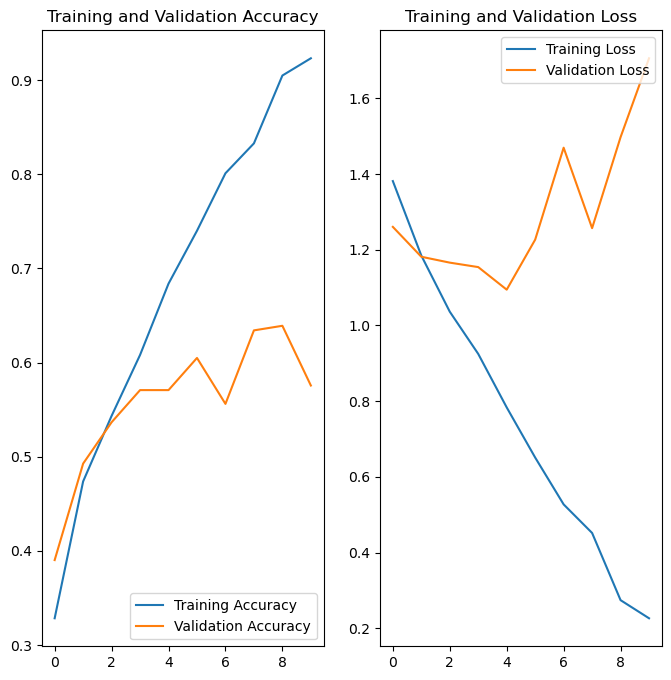

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(60, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax', name="outputs")
])

# Print model summary to check the architecture
print(model.summary())

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_valid, y_valid)
print(f'Validation accuracy: {val_acc}')

# Calculate the number of parameters in the model
total_params = model.count_params()
print(f'Total number of parameters: {total_params}')

# Access the history of training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))  # Adjust the range based on the actual number of epochs run

# Plotting the training and validation accuracy and loss
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


- CNN: The model I was asked to develop for this question uses a sequence of Conv2D layers with increasing filter sizes (32, 64, 128), each followed by a MaxPooling2D layer to reduce spatial dimensions and capture the most significant features. After the convolutional base, the model flattens the data and passes it through a series of dense layers with ReLU activation functions. A dropout layer with a rate of 0.5 is included before the final dense layer to help mitigate overfitting.

- Total Parameters: The CNN has a total of 6,874,632 parameters. This is typically larger than an MLP due to the presence of many filters in the convolutional layers, which are designed to capture spatial hierarchies in image data.

- Training Performance: The model's training accuracy improves consistently over the 10 epochs, which is a good indicator that the model is learning from the training data.

- Validation Performance: The best validation accuracy reported is approximately 63.41% at epoch 8, which suggests the model has the potential to perform well on unseen data.

- Comparison with MLP: Based on the test accuracy alone, the CNN outperforms the baseline MLP, which had a validation accuracy of approximately 29.27%. The CNN is better suited for image-related tasks due to its ability to preserve spatial relationships and extract features through its convolutional layers.

- Model Assessment: While the CNN shows an improvement over the MLP, the increasing validation loss indicates that further adjustments are necessary to improve generalization. Strategies like introducing early stopping, further tuning dropout rates, or applying data augmentation could potentially lead to better results.

### Question 1.4 Transfer learning (35 points)

In this question, we will use the several well-known architectures that has been trained on ImageNet which is a very large database of images of different categories. In a nutshell, these architectures have already learnt kernels which are supposed to be good not only for the task it has been train on but maybe for other tasks.

The idea is that first layers are not specialized for the particular task it has been trained on; only the last ones are. Therefore, we will load the existing network, remove the last fully connected layers, replace them by new connected layers (whose weights are randomly set), and train these last layers on a specific classification task - here, separate types of flower. The underlying idea is that the first convolutional layers of model, that has already been trained, corresponds to filters that are able to extract meaning features from images. And you will only learn the last layers for your particular problem.

❓ **Question** ❓ Write a first function `load_model()` that loads the pretrained models from `tensorflow.keras.applications`. Especially, look at the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications) to load the model where:
- the `weights` have been learnt on `imagenet`
- the `input_shape` corresponds to the input shape of any of your images - you have to resize them in case they are not of the same size
- the `include_top` argument is set to `False` in order not to load the fully-connected layers of the VGG-16 without the last layer which was specifically trained on `imagenet`

Write a function that takes the previous model as input the set the girst layers to be non-trainable, by applying `model.trainable = False`. Then check-out the summary of the model to see that now, the parameters are `non-trainable`. Then write a function that adds flattening and dense layers after the first convolutional layers. You can define each layer (or group of layers) separately and concatenate them using the classic `layers.Sequential()` like below:

```
model = tf.keras.Sequential([
  base_model,
  flattening_layer,
  dense_layer,
  prediction_layer
])
```

Replicate the above steps by adding a flattening and two dense layers (the first with 500 neurons) to the previous model.

Estimate the model and report the accuracy and loss achieved. Explain whether model would benefit from transfer lerarning in comparison to the previous model architectures.

Try to use the following models: VGG16, Inception, ResNet, MobileNet and EfficientNet and compare their performance and running time. Explain which model would work the best.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, InceptionV3, ResNet50, MobileNetV2, EfficientNetB0

def load_model(model_name, input_shape):
    if model_name == 'VGG16':
        return VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'InceptionV3':
        return InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'ResNet50':
        return ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'MobileNetV2':
        return MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'EfficientNetB0':
        return EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    else:
        raise ValueError("Unsupported model name")

def build_and_compile_model(base_model, num_classes):
    base_model.trainable = False  # Freeze the convolutional base
    # Adding new trainable layers on top
    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(500, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Settings
input_shape = (256, 256, 3)  # Standard input size for most models
num_classes = 4  # 4 types of classes

# Loading and compiling models
models_to_train = ['VGG16', 'InceptionV3', 'ResNet50', 'MobileNetV2', 'EfficientNetB0']
compiled_models = {}

for model_name in models_to_train:
    print(f"Loading and compiling the {model_name} model.")
    base_model = load_model(model_name, input_shape)
    model = build_and_compile_model(base_model, num_classes)
    compiled_models[model_name] = model
    print(f"{model_name} model summary:")
    model.summary()

Loading and compiling the VGG16 model.
VGG16 model summary:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Loading and compiling the InceptionV3 model.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 26s 0us/step
InceptionV3 model summary:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ ?                      │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

Loading and compiling the ResNet50 model.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 26s 0us/step
ResNet50 model summary:


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Loading and compiling the MobileNetV2 model.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
MobileNetV2 model summary:


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

Loading and compiling the EfficientNetB0 model.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
EfficientNetB0 model summary:


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ ?                      │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

- The function load_model() is implemented to load different pre-trained models with ImageNet weights while excluding the top fully connected layers (include_top=False), allowing for customization to the new task.
- The function build_and_compile_model() appropriately sets the base model layers to non-trainable (base_model.trainable = False), then extends the model with new trainable layers (Flatten and Dense layers) designed for the specific classification task.

In [ ]:
for model_name, model in compiled_models.items():
     print(f"Training the {model_name}...")
     history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
     val_loss, val_acc = model.evaluate(X_valid, y_valid)
     print(f"{model_name} - Validation accuracy: {val_acc}, Validation loss: {val_loss}")

Training the VGG16...
Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 245s 9s/step - accuracy: 0.4110 - loss: 5.8625 - val_accuracy: 0.7171 - val_loss: 0.8821
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 245s 9s/step - accuracy: 0.8435 - loss: 0.3611 - val_accuracy: 0.7122 - val_loss: 0.8200
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 255s 10s/step - accuracy: 0.9217 - loss: 0.1969 - val_accuracy: 0.7805 - val_loss: 0.6320
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 252s 10s/step - accuracy: 0.9634 - loss: 0.1002 - val_accuracy: 0.8000 - val_loss: 0.5538
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 253s 10s/step - accuracy: 0.9434 - loss: 0.1267 - val_accuracy: 0.7707 - val_loss: 0.6326
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 254s 10s/step - accuracy: 0.9518 - loss: 0.1138 - val_accuracy: 0.7854 - val_loss: 0.6245
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 254s 10s/step - accuracy: 0.9946 - loss: 0.0140 - val_accuracy: 0.8341 - val_loss: 0.5362
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 262s 10s/step - accuracy: 1.0000 - loss: 0.005

**Output considerations**

- VGG16: It achieves a high validation accuracy of approximately 83.41% with a relatively small validation loss. Its training pattern suggests that the model is capable of effectively transferring the learned features to the new task.

- InceptionV3: This model achieves a validation accuracy of approximately 88.78%. It demonstrates a relatively high validation loss, which could indicate some overfitting to the training data despite the good accuracy.

- ResNet50: Shows the least effective performance among the models, with a validation accuracy of around 48.78%. The loss values are relatively high, suggesting that the model may not be transferring the learned features as effectively as others.

- MobileNetV2: It yields the best validation accuracy among the models, with approximately 89.76%. The model's architecture makes it relatively efficient, resulting in shorter training times compared to some of the larger models like VGG16 and InceptionV3.

- EfficientNetB0: Surprisingly, it performs poorly on the task, with a validation accuracy close to 24.39%. This could be due to various factors, including possible issues with the implementation or the way this particular architecture interacts with the dataset.

Considering performance and running time, MobileNetV2 stands out as the most suitable choice for this task due to its high accuracy and efficient training time.